In [1]:
import pandas as pd

df_pred= pd.read_csv('labeled_ions_team_name_1.csv', sep = ';', index_col = [0])

import imageio.v3 as iio
from matplotlib import pyplot as plt

import itertools

pd.options.mode.chained_assignment = None

# Просмотр данных ручной разметки

In [2]:
for column in df_pred.columns:
    if pd.api.types.is_numeric_dtype(df_pred[column]):
        df_pred[column] = df_pred.astype({column: int})[column]

In [3]:
df_pred

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,760e3945-e0c9-4c9a-b78a-a68fbbee05cd.png,0,1,1,1
1,bc09db3b-dedf-49da-946c-efdf2304551b.png,1,0,1,1
2,45da543d-c099-4e17-9e18-f3c2776ae8b7.png,0,1,1,1
3,fbe18a1d-a194-4581-ad61-8aff1dcf045d.png,1,0,1,1
4,ccb1fa64-1a46-4680-82e3-178495a9121c.png,1,1,0,1
5,2067c2f1-a36b-4892-b96e-43028b0fea2d.png,1,1,1,1
6,687e714c-d32b-4c6b-9e26-d9dea275bccd.png,1,1,1,1
7,1813bf7c-24cc-4af0-a032-b70cfa74fbfa.png,1,0,1,1
8,7fd7c561-7522-46aa-b95b-9b66353eb63c.png,1,1,1,1
9,0f1ef869-4992-4a1a-af0d-9ed7dbc8d0fc.png,1,1,0,1


Qubit 1 state    0
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 0, dtype: object


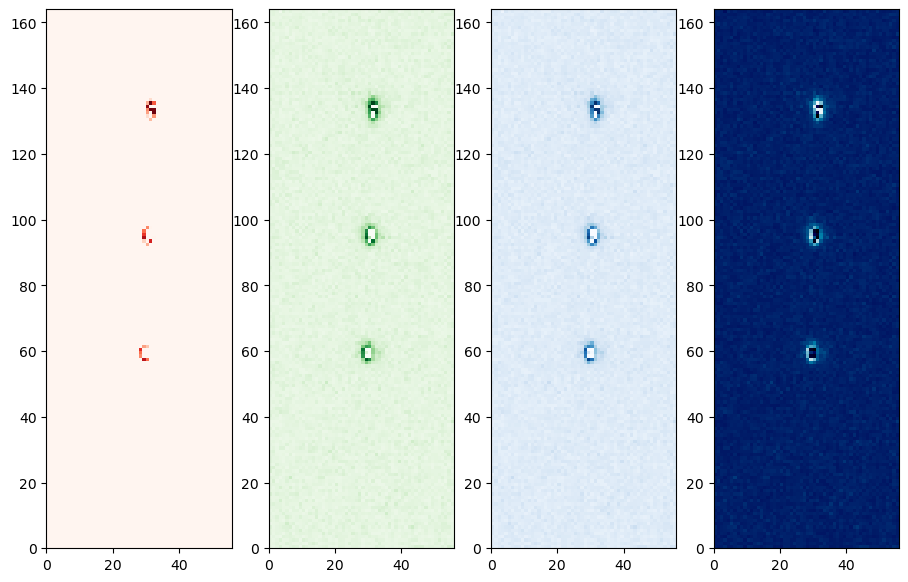

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 1, dtype: object


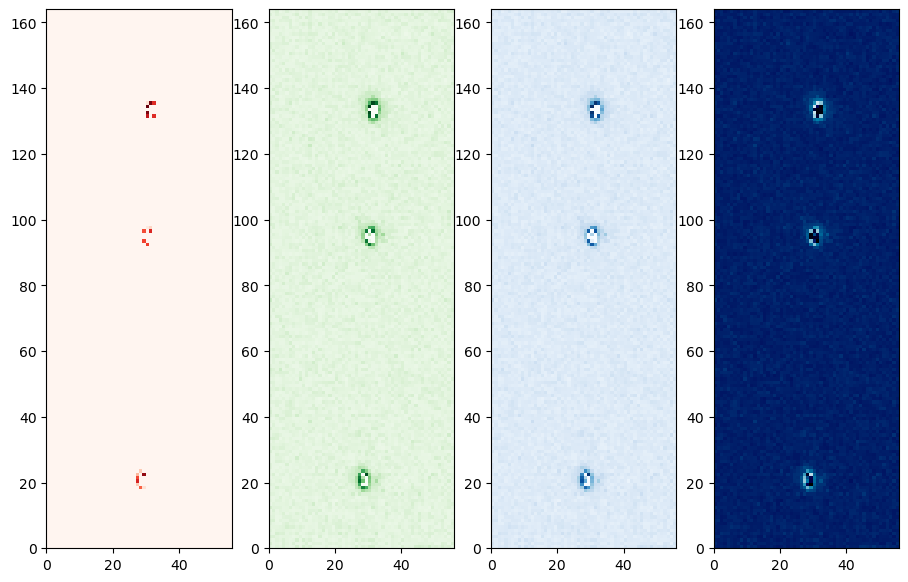

Qubit 1 state    0
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 2, dtype: object


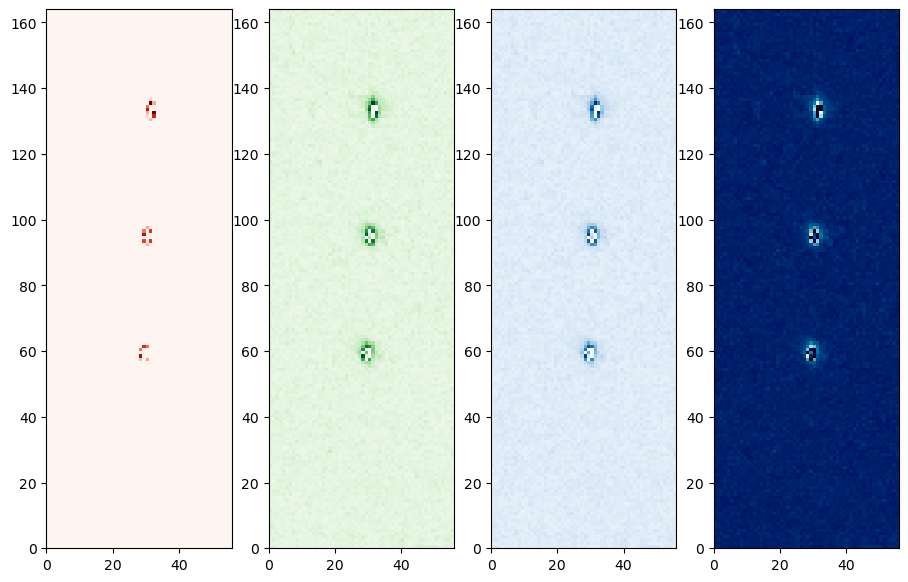

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 3, dtype: object


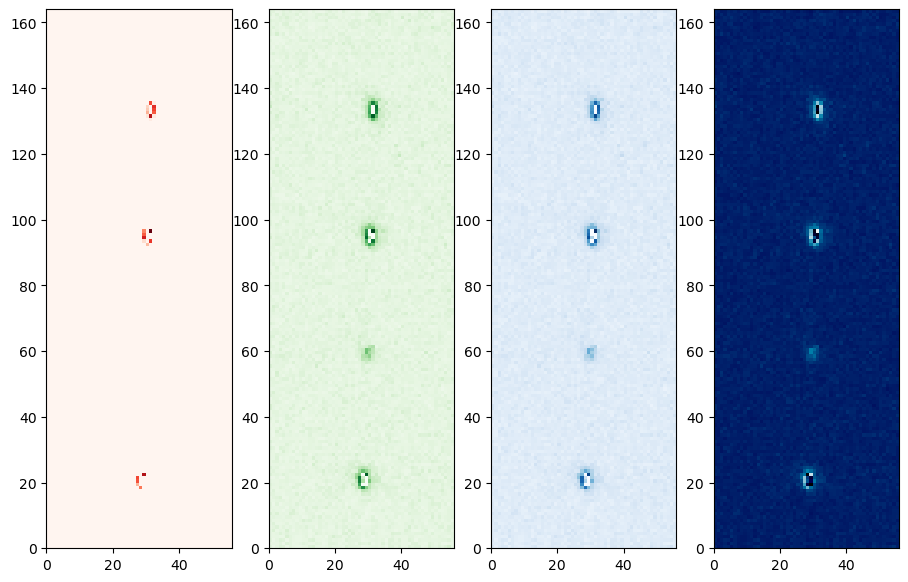

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    1
Name: 4, dtype: object


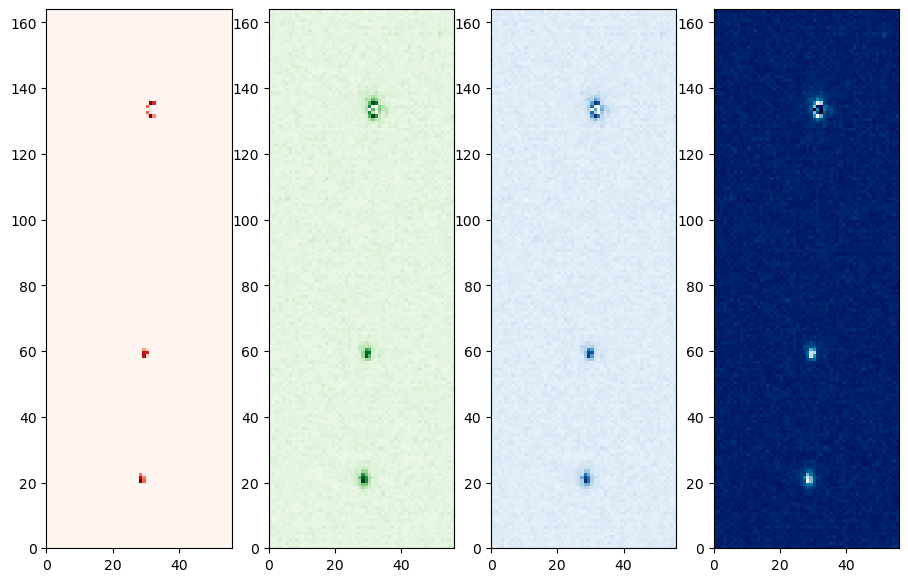

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 5, dtype: object


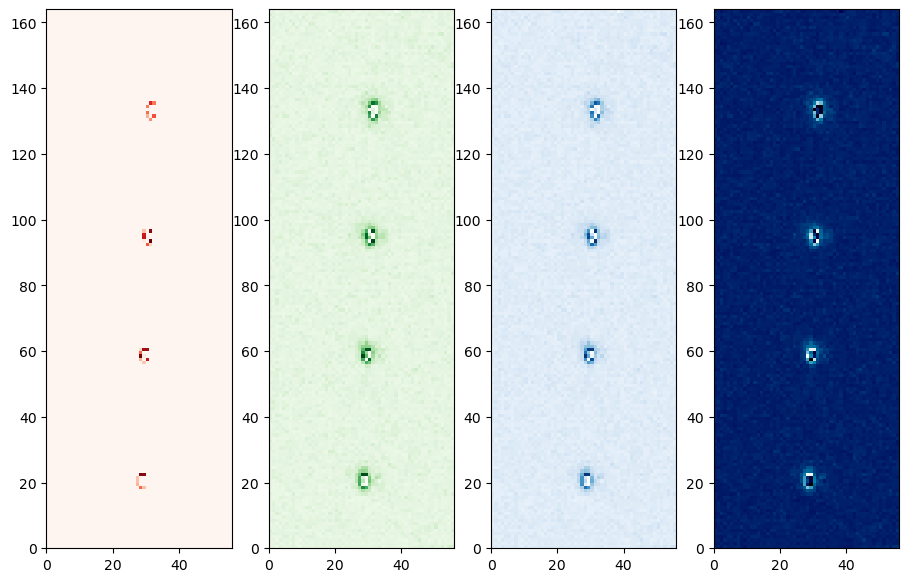

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 6, dtype: object


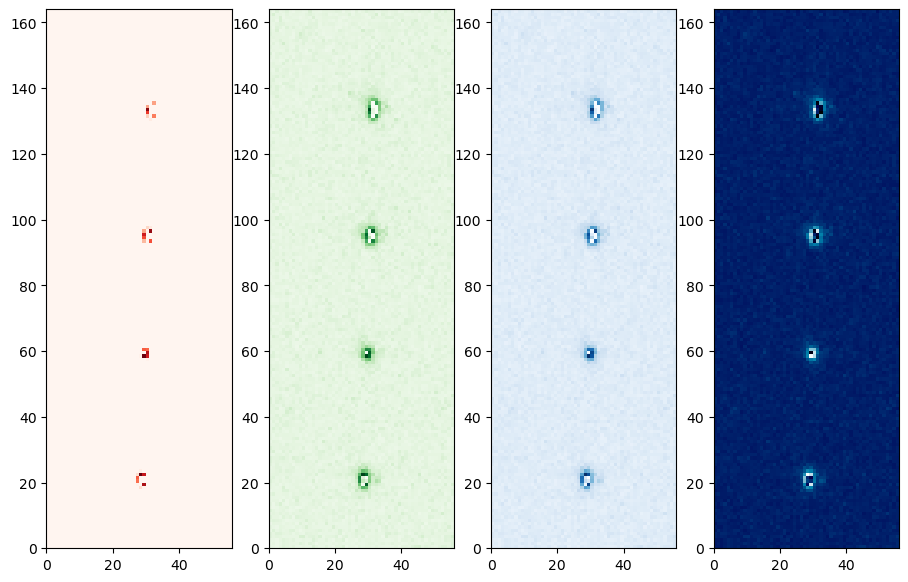

Qubit 1 state    1
Qubit 2 state    0
Qubit 3 state    1
Qubit 4 state    1
Name: 7, dtype: object


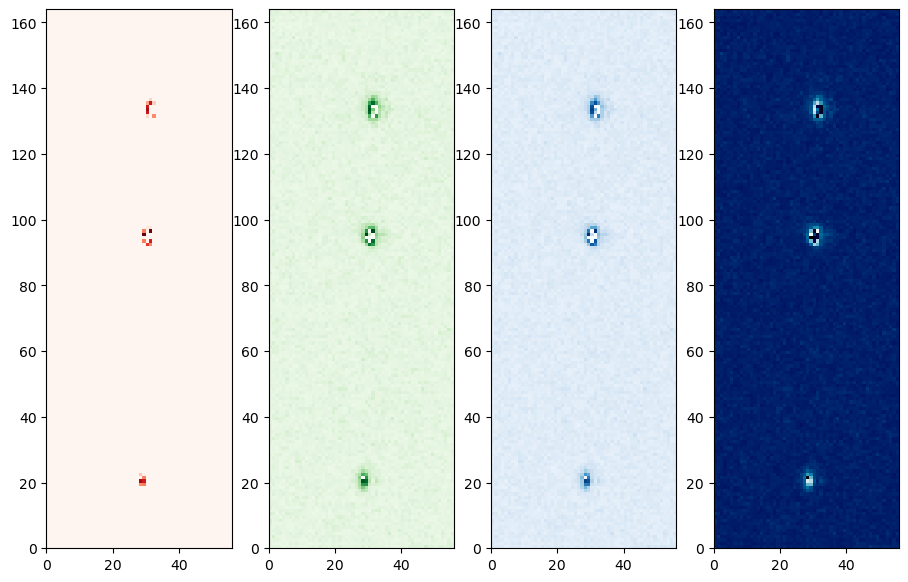

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    1
Qubit 4 state    1
Name: 8, dtype: object


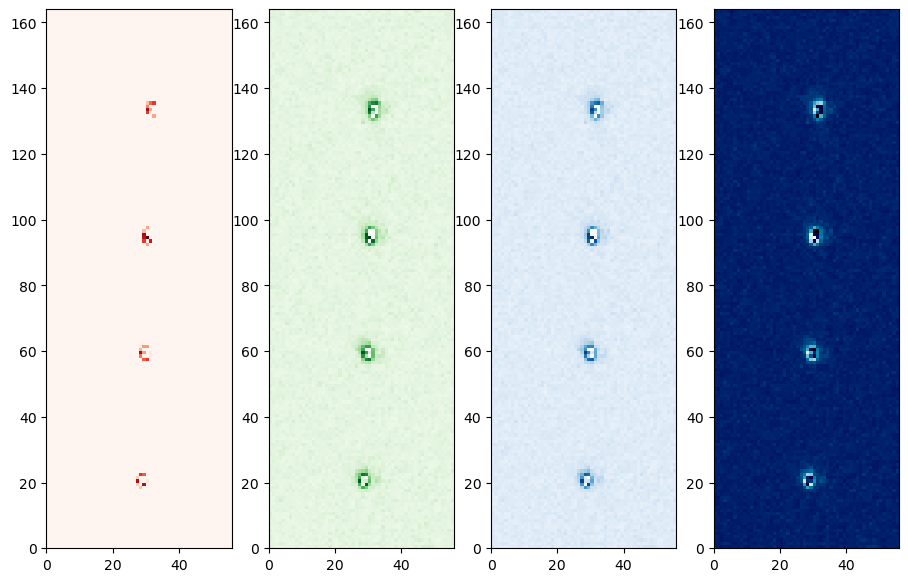

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    1
Name: 9, dtype: object


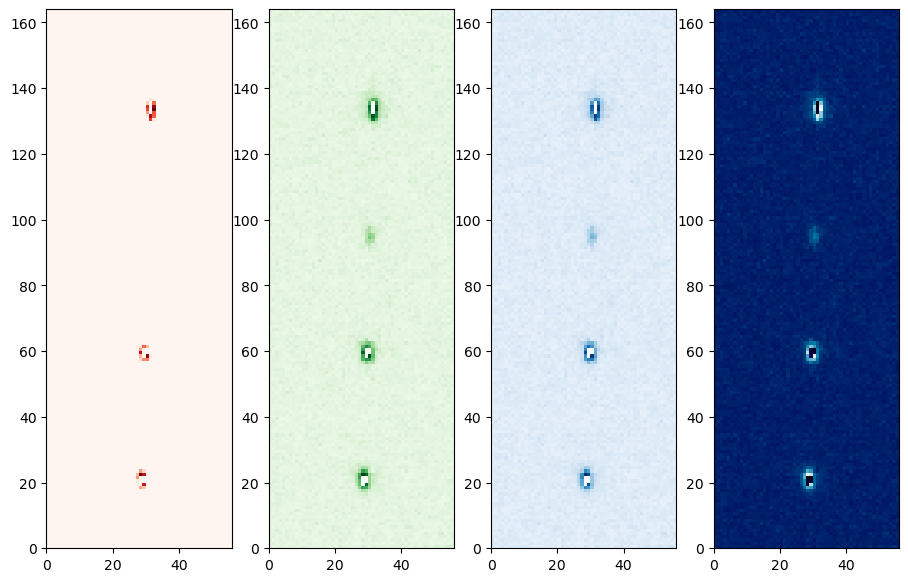

Qubit 1 state    1
Qubit 2 state    1
Qubit 3 state    0
Qubit 4 state    0
Name: 10, dtype: object


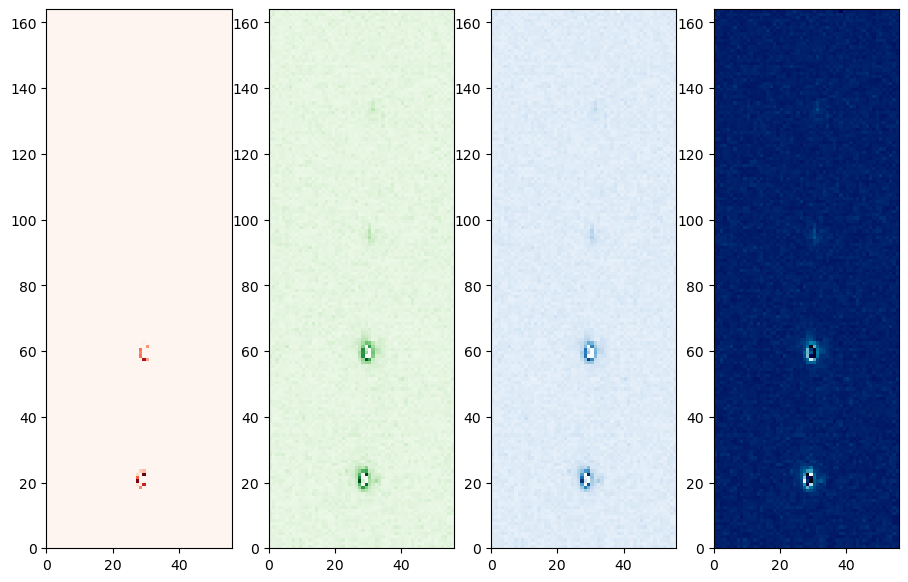

In [4]:
root = "./Входные данные/"
from IPython.display import Image, display
for index, row in df_pred.iterrows():
    im = iio.imread(root + row.Filename)
    
    print(row[1:5])
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(11, 7))
    ax[0].pcolormesh(im[:, :, 0], cmap="Reds")
    ax[1].pcolormesh(im[:, :, 1], cmap="Greens")
    ax[2].pcolormesh(im[:, :, 1], cmap="Blues")
    ax[3].pcolormesh(im)
    plt.show()

# Позиции ионов

In [5]:
import glob
import numpy as np

## Поканальная сумма для всех данных

In [6]:
all_ions_im = None
for im_path in glob.glob(root + "*.png"):
    im = iio.imread(im_path)
    try:
        all_ions_im = all_ions_im + im
    except TypeError:
        all_ions_im = im

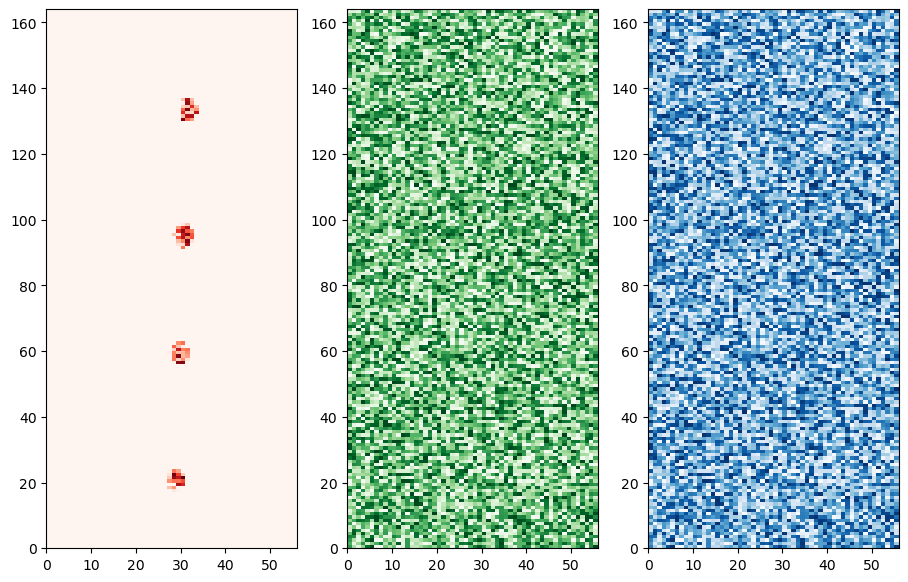

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 7))
ax[0].pcolormesh(all_ions_im[:, :, 0], cmap="Reds")
ax[1].pcolormesh(all_ions_im[:, :, 1], cmap="Greens")
ax[2].pcolormesh(all_ions_im[:, :, 1], cmap="Blues")

## Проекции на ось X и Y

(56, 3)
(164, 3)


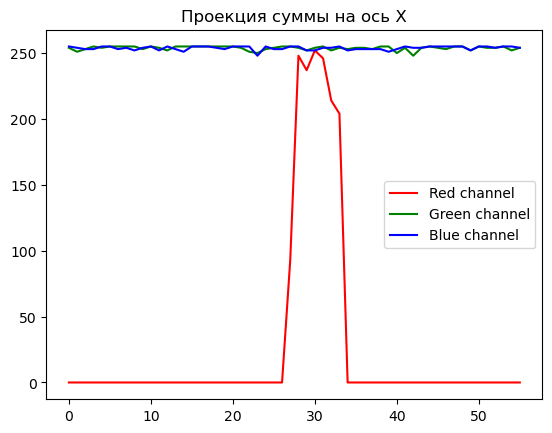

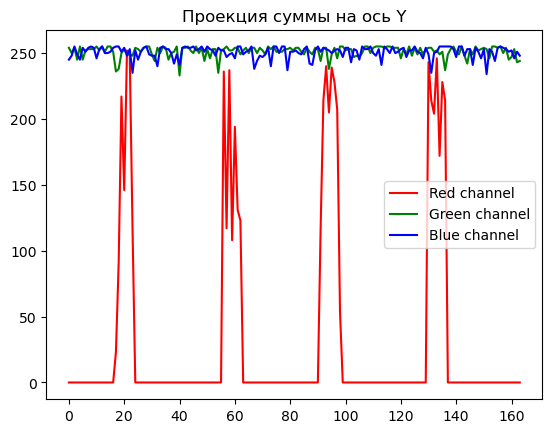

In [8]:
all_im_x = np.max(all_ions_im, axis=0)
print(all_im_x.shape)
all_im_y = np.max(all_ions_im, axis=1)
print(all_im_y.shape)
plt.plot(all_im_x[:, 0], color="Red", label="Red channel")
plt.plot(all_im_x[:, 1], color="Green", label="Green channel")
plt.plot(all_im_x[:, 2], color="Blue", label="Blue channel")
plt.title("Проекция суммы на ось Х")
plt.legend()
plt.show()

plt.plot(all_im_y[:, 0], color="Red", label="Red channel")
plt.plot(all_im_y[:, 1], color="Green", label="Green channel")
plt.plot(all_im_y[:, 2], color="Blue", label="Blue channel")
plt.title("Проекция суммы на ось Y")
plt.legend()
plt.show()

## Определение диапазона детектирования кубита

In [9]:
def find_not_zero(arr):
    y_position_intervals = []
    begin = None
    max_interval_len = 0
    for index, el in enumerate(arr):
        if begin is None and el > 0:
            begin = index
        elif begin is not None and el == 0:
            y_position_intervals.append((begin, index))
            max_interval_len = max(max_interval_len, index - begin)
            begin = None
    if begin is not None:
        y_position_intervals.append((begin, index))
        max_interval_len = max(max_interval_len, index - begin)
            
    for index, interval in enumerate(y_position_intervals):
        y_position_intervals[index] = (interval[0], interval[0] + max_interval_len)
    return y_position_intervals

In [10]:
def fine_adjust_x(x_position, y_index_list):    
    x_index_list = []
    max_interval_len = 0
    for x_interval, y_interval in itertools.product(x_position, y_index_list):
        single_im = all_ions_im[slice(*y_interval), slice(*x_interval), 0]

        single_im_x = np.max(single_im, axis=0)
        begin, end = find_not_zero(single_im_x)[0]
        max_interval_len = max(max_interval_len, end - begin)
        x_index_list.append((begin + x_interval[0], end + x_interval[0]))

    for index, interval in enumerate(x_index_list):
        x_index_list[index] = (interval[0], interval[0] + max_interval_len)
        
    return x_index_list

In [11]:
x_position = find_not_zero(all_im_x[:, 0])
y_index_list = find_not_zero(all_im_y[:, 0])
x_index_list = fine_adjust_x(x_position, y_index_list)

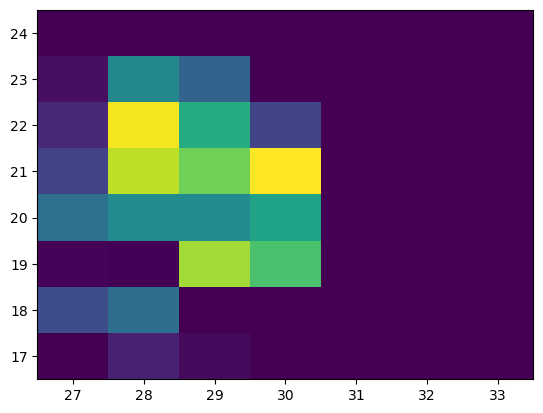

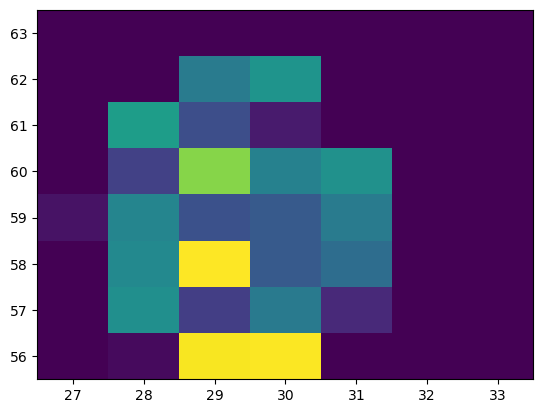

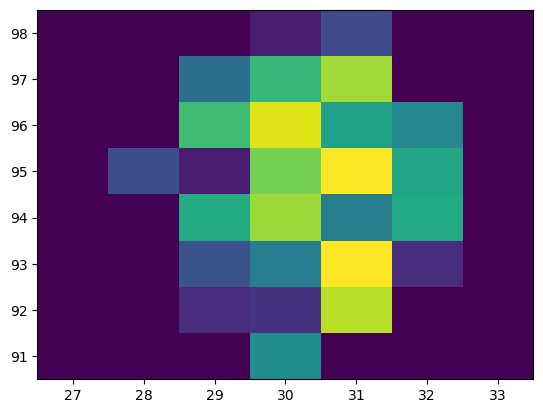

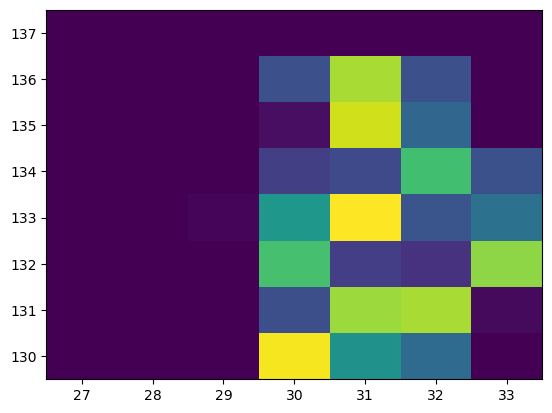

In [12]:
for x_interval, y_interval in itertools.product(x_position, y_index_list):
    single_im = all_ions_im[slice(*y_interval), slice(*x_interval), 0]
    x = np.arange(*x_interval)
    y = np.arange(*y_interval)
    xx, yy = np.meshgrid(x, y)
    plt.pcolormesh(xx, yy, single_im)
    plt.show()

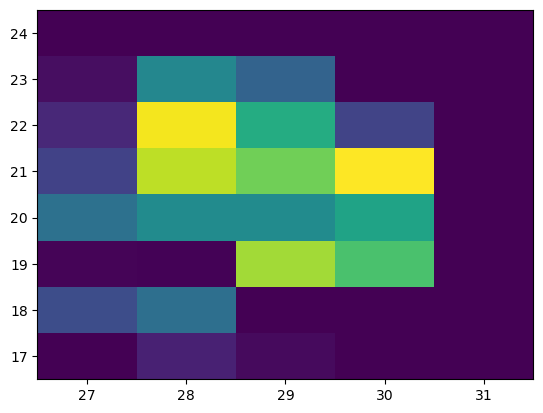

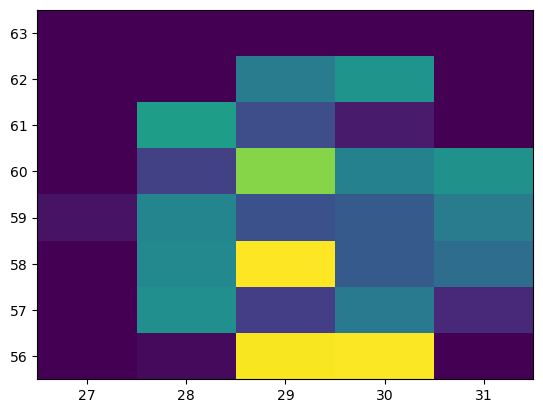

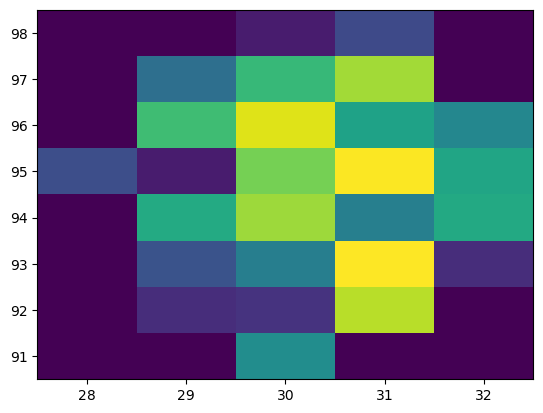

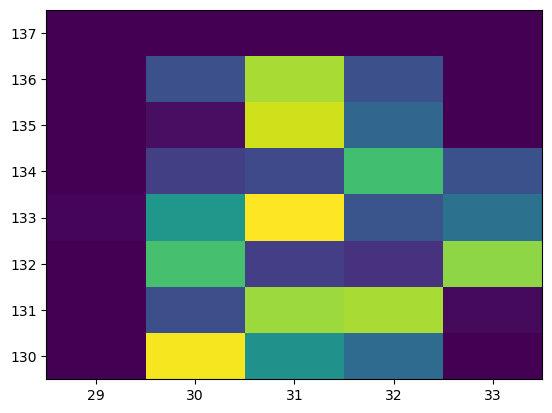

In [13]:
for x_interval, y_interval in zip(x_index_list, y_index_list):
    single_im = all_ions_im[slice(*y_interval), slice(*x_interval), 0]
    x = np.arange(*x_interval)
    y = np.arange(*y_interval)
    xx, yy = np.meshgrid(x, y)
    plt.pcolormesh(xx, yy, single_im)
    plt.show()

# Functions

In [14]:
def split_images_df(df):
    res = None
    for qubit_num in range(1, 5):
        temp = df.iloc[:, [0, qubit_num]]
        temp["Qubit num"] = qubit_num * np.ones(temp.shape[0], dtype=int)
        temp = temp.rename(columns={'Qubit ' + str(qubit_num) + ' state':'Qubit state'})

        res = pd.concat([res, temp])
    res = res.reset_index()
    return res

In [15]:
def back_to_orig_df(df):
    res = pd.DataFrame(columns=df_pred.columns)
    for index, filename, state, qubit_num in zip(df["index"], df["Filename"], df["Qubit state"], df["Qubit num"]):
        res.loc[index, "index"] = index
        res.loc[index, "Filename"] = filename
        res.loc[index, "Qubit {0} state".format(qubit_num)] = state
            
    res.drop(["index"], inplace=True, axis=1)
    return res

In [16]:
def get_single_qubit_im(filename, i):
    im_path = root + filename
    im = iio.imread(im_path)
    im_single = im[slice(*y_index_list[i-1]), slice(*x_index_list[i-1]), :]
    im_single = im_single[:, :, 0]

    return im_single

In [17]:
def plot_image(image):
    fig, ax = plt.subplots(nrows=1, ncols=3)
    ax[0].pcolormesh(image[:, :, 0], cmap="Reds")
    ax[1].pcolormesh(image[:, :, 1], cmap="Greens")
    ax[2].pcolormesh(image[:, :, 1], cmap="Blues")
    plt.show()

# Threshold

In [18]:
def count_state(df, qubit_state):
    res_min = None
    res_max = None
    
    df_transformed = split_images_df(df)
    df_pred_single_state = df_transformed[df_transformed["Qubit state"] == qubit_state]
    for filename, qubit_num in zip(df_pred_single_state["Filename"], df_pred_single_state["Qubit num"]):
        im_single = get_single_qubit_im(filename, qubit_num)
        average = im_single.mean()
        try:
            res_min = min(res_min, average)
            res_max = max(res_max, average)
        except TypeError:
            res_min = average
            res_max = average
    return res_min, res_max

In [19]:
threshold = min(
    min(count_state(df_pred, 0)) + max(count_state(df_pred, 1)), 
    max(count_state(df_pred, 0)) + min(count_state(df_pred, 1))
) / 2

## Threshold classification

In [20]:
threshold_df = pd.DataFrame(columns=df_pred.columns)
for index, im_path in enumerate(glob.glob(root + "*.png")):
    threshold_df.loc[index, "Filename"] = im_path[len(root):]
threshold_df_transformed = split_images_df(threshold_df)

for index, filename, qubit_num in zip(range(threshold_df_transformed.size), threshold_df_transformed["Filename"], threshold_df_transformed["Qubit num"]):    
    im_single = get_single_qubit_im(filename, qubit_num)
    if np.average(im_single) > threshold:
        state = 1
    else:
        state = 0
            
    threshold_df_transformed.loc[index, "Qubit state"] = state    
threshold_df = back_to_orig_df(threshold_df_transformed)

# Classic ML

## SVM regression

In [21]:
import sklearn as sk 
from sklearn import svm 
import pandas as pd 
import os 

### Learning

In [22]:
df_pred_transformed = split_images_df(df_pred)
X = []
for filename, qubit_num in zip(df_pred_transformed["Filename"], df_pred_transformed["Qubit num"]):
    X.append(get_single_qubit_im(filename, qubit_num).ravel())
y = df_pred_transformed["Qubit state"]

SVM = svm.LinearSVC(max_iter=1200000) 
SVM.fit(X, y)

/Users/Lazemir/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(max_iter=1200000)

### Predicts

In [23]:
df_test = pd.DataFrame(columns=df_pred.columns)
for index, im_path in enumerate(glob.glob(root + "*.png")):
    df_test.loc[index, "Filename"] = im_path[len(root):]
df_test_transformed = split_images_df(df_test)

X = []
for filename, qubit_num in zip(df_test_transformed["Filename"], df_test_transformed["Qubit num"]):
    X.append(get_single_qubit_im(filename, qubit_num).ravel())

y = SVM.predict(X)
df_test_transformed["Qubit state"] = y
CML_df = back_to_orig_df(df_test_transformed)
CML_df

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,ada857de-c646-4e71-ba35-eb69cd4ae1c2.png,0,1,0,1
1,43ae79ec-569e-48e2-b5da-e33f423311d8.png,1,0,0,1
2,f26206f6-817c-4f04-b1f5-a70d02fd301f.png,1,1,0,1
3,a8319017-ecb7-456d-83c6-2c57bdddf52f.png,1,1,1,0
4,f228962a-2f34-4d6f-b016-1b3482c006c3.png,1,1,1,0
...,...,...,...,...,...
1015,fc24a220-e09e-46de-a097-826b620d63f9.png,1,1,0,1
1016,da63f25b-b65e-40f7-8a6b-e83fdbfc5e17.png,1,1,0,1
1017,888d2e1e-e5ea-40ae-afe9-243c45ed9544.png,1,1,0,1
1018,f37c4cc2-426f-4013-9243-72b8eb2637c2.png,0,1,0,1


# Quantum ML

## QUBO SVM

In [24]:
import neal
import pickle as pkl
import yaml

### Learning

In [26]:
df_pred_transformed = split_images_df(df_pred)
X_train = []
for filename, qubit_num in zip(df_pred_transformed["Filename"], df_pred_transformed["Qubit num"]):
    X_train.append(get_single_qubit_im(filename, qubit_num).ravel())
X_train = np.asarray(X_train)
N = X_train.shape[0]
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

Y = np.asarray(df_pred_transformed["Qubit state"])
Y = 2 * Y - 1
Y = Y.reshape((-1, 1))

m = -30
l = 0

P = 2.**np.arange(m, l + 1)
P_cal = np.kron(np.diag(np.ones(N)), P.T)

# c = 10
# reg = c * P_cal.T @ np.diag(Y) @ X @ X.T @ np.diag(Y) @ P_cal

g = 0
Q = 1/2 * P_cal.T @ (((X_train@X_train.T) * (Y@Y.T)) + g*(Y@Y.T)) @ P_cal - np.diag(P_cal.T @ np.ones(N))

In [54]:
def server_sampler(Q):
    with open("task2.pkl", "wb") as f:
        pkl.dump(Q, f)



    qiopt_settings = """
    problems:
      - id: task2
        data_dir: ~/problems/task2/data_dir/
        type: QUBO
        objective:
            to: min
            filenames: task2.pkl
    simcim:
      opts:
        num_runs: 10
        num_steps: 1000
    """

    with open("task2.yaml", "w") as f:
        f.write(qiopt_settings)



    qiopt_script = """
    set -e

    CONFIG_PATH="~/problems/task2/task2.yaml"
    OUT_DIR="~/problems/task2/output"
    OUT_DIR_EXP=$(eval echo "$OUT_DIR")

    mkdir -p $OUT_DIR_EXP
    echo "Using config_file: $CONFIG_PATH"
    ~/.qiopt/qiopt run -c $CONFIG_PATH -o $OUT_DIR
    """

    with open("run_t2.sh", "w") as f:
        f.write(qiopt_script)



    !scp ./task2.pkl team4@212.233.77.39:~/problems/task2/data_dir/
    !scp ./task2.yaml team4@212.233.77.39:~/problems/task2/
    !scp ./run_t2.sh team4@212.233.77.39:~/problems/task2/
    !ssh team4@212.233.77.39 '~/problems/task2/run_t2.sh'
    !scp team4@212.233.77.39:~/problems/task2/output/solution.yaml ./



    with open("solution.yaml", "r") as f:
        data = yaml.safe_load(f)
    return np.asarray(list(data[0]['solution']['variables'].values()), dtype=int)

In [28]:
def local_sampler(Q):
    sampler = neal.SimulatedAnnealingSampler()
    sampleset = sampler.sample_qubo(Q, num_reads=10)
    return np.asarray(list(sampleset.first.sample.values()), dtype=int)

In [73]:
data_server = server_sampler(Q)
# data_local = local_sampler(Q)

task2.pkl                                     100%   14MB   2.2MB/s   00:06    
task2.yaml                                    100%  242    10.4KB/s   00:00    
run_t2.sh                                     100%  262     9.7KB/s   00:00    
Using config_file: ~/problems/task2/task2.yaml
2023-11-24 06:04:59,605 - main - INFO - /app/qiopt/main.py - CURRENT DIR: /app/qiopt
2023-11-24 06:04:59,619 - main - INFO - /app/qiopt/main.py - Combinatorial solver SimCIMSolver loaded
2023-11-24 06:04:59,621 - main - INFO - /app/qiopt/main.py - QUBO problem 'task2' loaded
2023-11-24 06:04:59 bf4f035d26d1 model[7] INFO Loaded Q: /home/team4/problems/task2/data_dir/task2.pkl
2023-11-24 06:05:06,090 - main - INFO - /app/qiopt/main.py - Problem completed
2023-11-24 06:05:06,149 - main - INFO - /app/qiopt/main.py - Solution results saved to /home/team4/problems/task2/output/solution.yaml
solution.yaml                                 100%   23KB 324.8KB/s   00:00    


In [84]:
for el_local, el_server in zip(data_local, data_server):
    print(el_local, el_server)

0 1
0 0
0 0
1 0
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
1 1
0 1
0 0
0 1
0 1
1 0
1 0
1 1
1 1
0 1
1 0
1 1
0 0
0 1
1 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 0
1 1
0 1
0 0
1 0
1 1
0 1
0 1
1 1
1 1
1 0
1 1
0 1
0 0
0 0
1 1
0 1
0 1
0 1
1 1
0 1
1 0
1 0
0 1
0 1
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [86]:
print(data_local.mean(), data_server.mean())

0.13343108504398826 0.11510263929618768


In [74]:
data = data_server[:]

In [75]:
Lambda_cal = data.reshape(-1, 1)
Lambda = P_cal @ Lambda_cal
w = X_train.T @ (Lambda * Y)

## Predicts

In [76]:
df_test = pd.DataFrame(columns=df_pred.columns)
for index, im_path in enumerate(glob.glob(root + "*.png")):
    df_test.loc[index, "Filename"] = im_path[len(root):]
df_test_transformed = split_images_df(df_test)

X = []
for filename, qubit_num in zip(df_test_transformed["Filename"], df_test_transformed["Qubit num"]):
    X.append(get_single_qubit_im(filename, qubit_num).ravel())
X = np.asarray(X)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

y = X @ w
res = np.sign(y)
res = (res + 1) / 2

df_test_transformed["Qubit state"] = res
df_test_transformed["Qubit state"] = df_test_transformed["Qubit state"].astype(int)

QML_df = back_to_orig_df(df_test_transformed)

# Метрики

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score 
from IPython.display import display, Image

In [78]:
def print_metrics(df_true, df_pred):
    y_true = list(split_images_df(df_true)["Qubit state"].values)
    y_pred = list(split_images_df(df_pred)["Qubit state"].values)

    print("Precision: ", precision_score(y_true, y_pred))
    print("Recall: ", recall_score(y_true, y_pred))
    print("F_1: ", f1_score(y_true, y_pred))

## Threshold и Classic ML

In [79]:
print_metrics(threshold_df, CML_df)

Precision:  1.0
Recall:  0.9895765472312703
F_1:  0.9947609692206941


## Threshold и QUBO

In [80]:
print_metrics(threshold_df, QML_df)

Precision:  0.0
Recall:  0.0
F_1:  0.0


/Users/Lazemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Classic ML и QUBO

In [64]:
print_metrics(CML_df, QML_df)

Precision:  0.0
Recall:  0.0
F_1:  0.0


/Users/Lazemir/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Разница моделей

In [65]:
def show_differece(df1, df2):
    assert(df1.size == df2.size)
    df1_transformed = split_images_df(df1)
    df2_transformed = split_images_df(df2)
    merged_df = pd.merge(df1_transformed, df2_transformed, how='inner', on=['Filename', 'Qubit num'])
    diff_df = merged_df[merged_df["Qubit state_x"] != merged_df["Qubit state_y"]]
    print("Difference found in {0} qubits, {percent:.2%}".format(diff_df.size, percent=diff_df.size/df1_transformed.size))
    for row in diff_df.iterrows():
        print("Difference in file: {0}".format(row[1]["Filename"]))
        print("Difference in qubit: {0}".format(row[1]["Qubit num"]))
        print("First model predict: {0}".format(row[1]["Qubit state_x"]))
        print("Second model predict: {0}".format(row[1]["Qubit state_y"]))
        display(Image(filename=root + filename))

## Threshold и Classic ML

Difference found in 192 qubits, 1.18%
Difference in file: e81ee8ae-0565-4f2e-a967-b69a8404e8bf.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


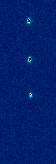

Difference in file: 93a17be6-7626-4c7d-a20b-5bb0b3c3aaa1.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


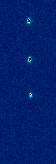

Difference in file: 56095ff3-a25c-4221-8c9a-6cf01e6b83df.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


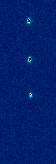

Difference in file: 48b01412-031c-4b83-a2f3-45e3d76def23.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


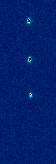

Difference in file: 12e6ff0d-5d86-4105-8c6f-16e5a11da8d9.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


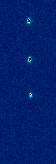

Difference in file: e614ef01-0828-4365-8787-3aa0fde10215.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


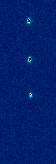

Difference in file: 44b438ff-a341-46aa-85e6-017466fe83d7.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


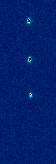

Difference in file: d852c2a6-07b8-4526-b089-c5330f0a6439.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


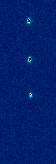

Difference in file: 4483232c-cf05-45ed-978a-915f35b86bdb.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


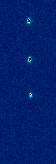

Difference in file: cf4cc71c-3ff9-428a-b09d-7530f3f619be.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


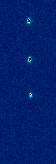

Difference in file: 1aa04d61-f88b-46f1-b21b-5b5498c0ae78.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


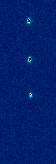

Difference in file: 3c9a522d-eef3-4199-82eb-b2ff1fb8b96f.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


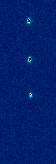

Difference in file: e614ef01-0828-4365-8787-3aa0fde10215.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


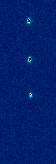

Difference in file: 5b620190-a569-450a-9a06-c3178c4f6ce6.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


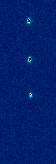

Difference in file: faef8df3-bc69-4c22-a18f-fe42516d857f.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


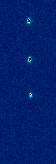

Difference in file: 9b6262f1-55b0-4f75-b1c8-8546c416702e.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


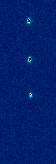

Difference in file: e4a19f6e-32a2-44dc-a115-2fb129a5dea9.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


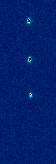

Difference in file: 3216d16f-b244-4664-9b16-30bc8b68cb66.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


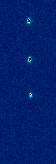

Difference in file: 89033b5b-683c-4a81-9ffd-3c9b9b5fa770.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


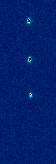

Difference in file: 4732b5a3-7dd7-43da-9788-15d83fb08cc2.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


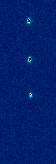

Difference in file: 28a0b8ab-35cb-42bc-ba55-515d30ced62c.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


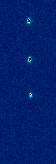

Difference in file: e9c69f56-0e17-4be4-a97e-61cf3994e302.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


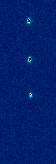

Difference in file: 1f0b5c40-bdd3-45d7-be1f-d94e7836e16d.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


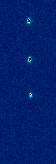

Difference in file: 85b4740e-c682-4401-b6a4-017d8d490725.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


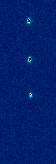

Difference in file: 2e14596a-6275-478f-ae35-5eaf0d13fb9f.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


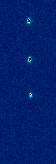

Difference in file: 71918ae4-6e1d-4fa4-8b15-e2428b9b7c52.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


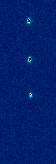

Difference in file: cb0eb6e5-ed17-4f1f-af6d-33dc6fa7843f.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


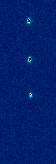

Difference in file: 1e59fefb-6b32-4b6a-b16d-9e66e2c820dd.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


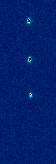

Difference in file: 1aa04d61-f88b-46f1-b21b-5b5498c0ae78.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


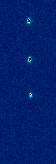

Difference in file: 3ab3f6f9-26bd-4814-898a-0fcec4842db1.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


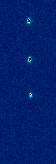

Difference in file: ca902da2-19c0-45cf-8449-fd47044e7aab.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


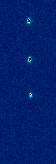

Difference in file: f790ca40-1f61-4ec2-978f-73831a0456fd.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


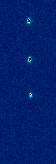

In [39]:
show_differece(threshold_df, CML_df)

## Threshold и QUBO

Difference found in 222 qubits, 1.36%
Difference in file: e81ee8ae-0565-4f2e-a967-b69a8404e8bf.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


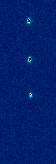

Difference in file: 93a17be6-7626-4c7d-a20b-5bb0b3c3aaa1.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


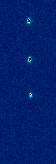

Difference in file: 56095ff3-a25c-4221-8c9a-6cf01e6b83df.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


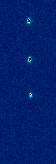

Difference in file: 48b01412-031c-4b83-a2f3-45e3d76def23.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


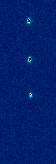

Difference in file: 12e6ff0d-5d86-4105-8c6f-16e5a11da8d9.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


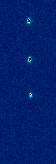

Difference in file: e614ef01-0828-4365-8787-3aa0fde10215.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


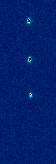

Difference in file: 44b438ff-a341-46aa-85e6-017466fe83d7.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


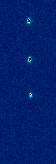

Difference in file: d852c2a6-07b8-4526-b089-c5330f0a6439.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


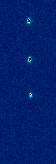

Difference in file: 4483232c-cf05-45ed-978a-915f35b86bdb.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


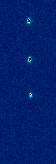

Difference in file: cf4cc71c-3ff9-428a-b09d-7530f3f619be.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


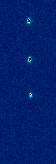

Difference in file: f627c30f-21bd-4a05-9a07-39db80fcfb0c.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


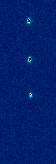

Difference in file: 1aa04d61-f88b-46f1-b21b-5b5498c0ae78.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


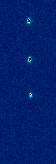

Difference in file: 2d412a80-0028-4a20-879d-bb82c0018cfd.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


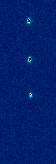

Difference in file: 3b3dd912-95ef-4257-b3d4-2c7496abb4dc.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


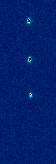

Difference in file: 3c9a522d-eef3-4199-82eb-b2ff1fb8b96f.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


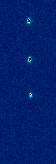

Difference in file: 284b8806-ded4-49c9-a9b8-22d624e66d2c.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


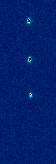

Difference in file: b9bc93cc-39c9-48aa-8240-7791e21fb873.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


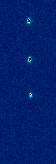

Difference in file: e614ef01-0828-4365-8787-3aa0fde10215.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


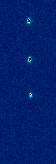

Difference in file: 5b620190-a569-450a-9a06-c3178c4f6ce6.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


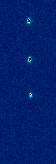

Difference in file: faef8df3-bc69-4c22-a18f-fe42516d857f.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


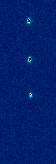

Difference in file: 9b6262f1-55b0-4f75-b1c8-8546c416702e.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


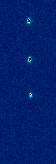

Difference in file: e4a19f6e-32a2-44dc-a115-2fb129a5dea9.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


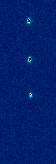

Difference in file: 3216d16f-b244-4664-9b16-30bc8b68cb66.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


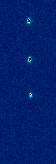

Difference in file: 89033b5b-683c-4a81-9ffd-3c9b9b5fa770.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


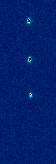

Difference in file: 4732b5a3-7dd7-43da-9788-15d83fb08cc2.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


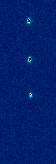

Difference in file: 28a0b8ab-35cb-42bc-ba55-515d30ced62c.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


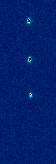

Difference in file: e9c69f56-0e17-4be4-a97e-61cf3994e302.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


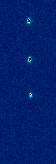

Difference in file: 1f0b5c40-bdd3-45d7-be1f-d94e7836e16d.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


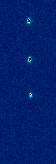

Difference in file: 85b4740e-c682-4401-b6a4-017d8d490725.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


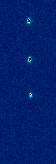

Difference in file: 2e14596a-6275-478f-ae35-5eaf0d13fb9f.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


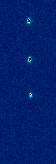

Difference in file: 71918ae4-6e1d-4fa4-8b15-e2428b9b7c52.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


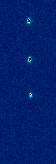

Difference in file: cb0eb6e5-ed17-4f1f-af6d-33dc6fa7843f.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


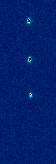

Difference in file: 1e59fefb-6b32-4b6a-b16d-9e66e2c820dd.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


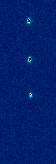

Difference in file: 1aa04d61-f88b-46f1-b21b-5b5498c0ae78.png
Difference in qubit: 3
First model predict: 1
Second model predict: 0


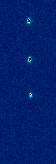

Difference in file: 3ab3f6f9-26bd-4814-898a-0fcec4842db1.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


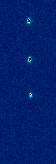

Difference in file: ca902da2-19c0-45cf-8449-fd47044e7aab.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


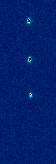

Difference in file: f790ca40-1f61-4ec2-978f-73831a0456fd.png
Difference in qubit: 4
First model predict: 1
Second model predict: 0


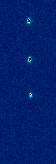

In [40]:
show_differece(threshold_df, QML_df)

## Classic ML и QUBO

Difference found in 30 qubits, 0.18%
Difference in file: f627c30f-21bd-4a05-9a07-39db80fcfb0c.png
Difference in qubit: 1
First model predict: 1
Second model predict: 0


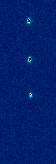

Difference in file: 2d412a80-0028-4a20-879d-bb82c0018cfd.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


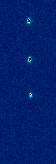

Difference in file: 3b3dd912-95ef-4257-b3d4-2c7496abb4dc.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


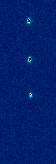

Difference in file: 284b8806-ded4-49c9-a9b8-22d624e66d2c.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


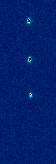

Difference in file: b9bc93cc-39c9-48aa-8240-7791e21fb873.png
Difference in qubit: 2
First model predict: 1
Second model predict: 0


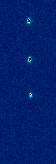

In [41]:
show_differece(CML_df, QML_df)

# Save

In [42]:
# QML_df.to_csv("./labeled_ions_team_number.csv", sep=';')